# Utility to Generate Normal Curves

I've been working on the final project for Udacity course, Descriptive Statistics.  To answer some of the questions, I wanted to show a visual representation of the probability distribution function.  During my initial dev phase of the project, I threw together several PDF plots, all very similar, but add features or changing variable values...  Suffice it to say, it was not [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself).  This led me to create a utility function that generates PDF plots with a few 'bells and whistles'.

To start with, I used [numpy](http://www.numpy.org/) to generate a series of x values, [scipy](https://www.scipy.org/) to calcualte the PDF values, and [matplotlib](http://matplotlib.org/) to plot.

## Plotting a normal curve

In [1]:
%matplotlib inline
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt

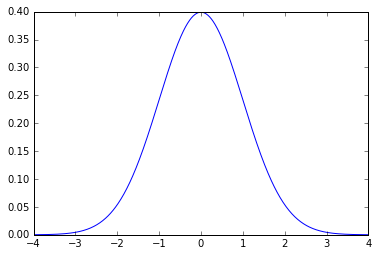

In [2]:
x = np.arange(-4,4,.01)
y = norm.pdf(x, 0, 1)

plt.plot(x, y)

With just a few lines, we have easily plotted a normal curve!  The scipy function for a [normal distribution PDF](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) accepts three arguments, a scalar or vector, a mean, and a standard deviation.  For a standard normal curve, our value of $\mu$ (mu, the mean) is 0 and $\sigma$ (sigma, the standard deviation) of 1.

It certainly is accurate, but not so pretty.  Is pretty important?  Yeah, it is.

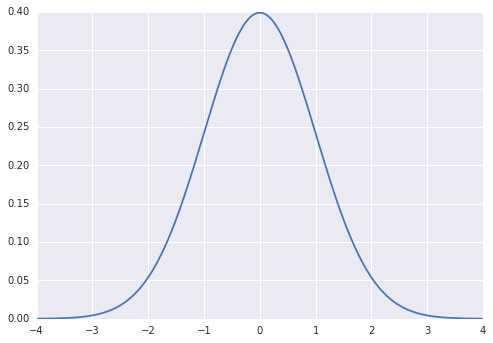

In [3]:
import seaborn as sns
sns.set()
plt.plot(x, y)

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) to the resuce!  Seaborn is built ontop of matplotlib and sets a lot of very good looking defaults.  Tweaking the output is very easy as well.

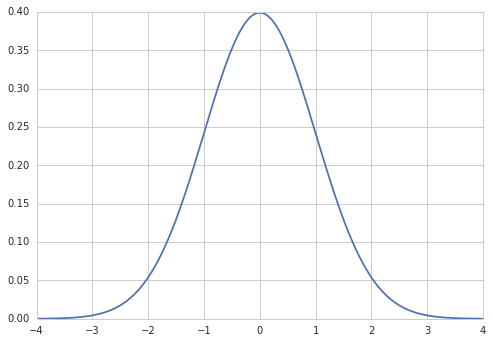

In [4]:
sns.set_style("whitegrid")
plt.plot(x, y)

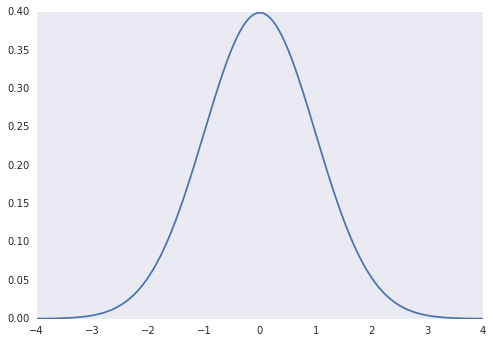

In [5]:
sns.set_style("dark")
plt.plot(x, y)

The "dark" looks pretty good.  Let's add some veritcal lines that depict the mean value lies.

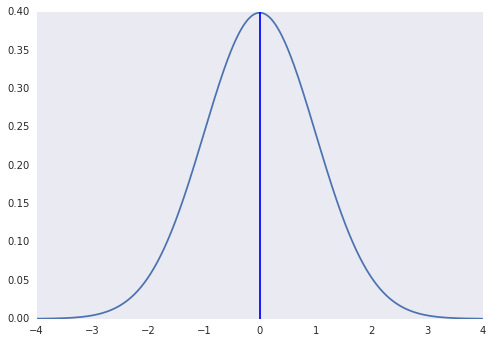

In [6]:
plt.plot(x, y)
plt.axvline(x=0)

Well, that's okay ...  but that blue ...  ugh.  Why can't we match the rest of that lovely seaborn color pallet...  We can!

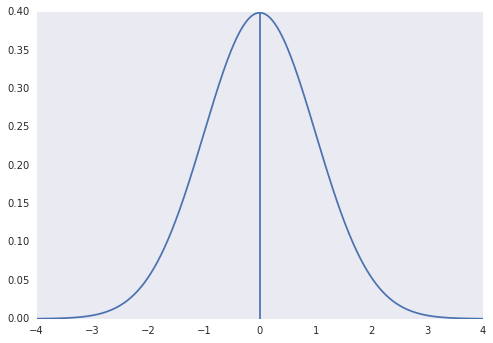

In [7]:
sns.set_color_codes()
plt.plot(x, y)
plt.axvline(x=0)

Alright!  Let's make a few other [style tweaks](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D) to the line.

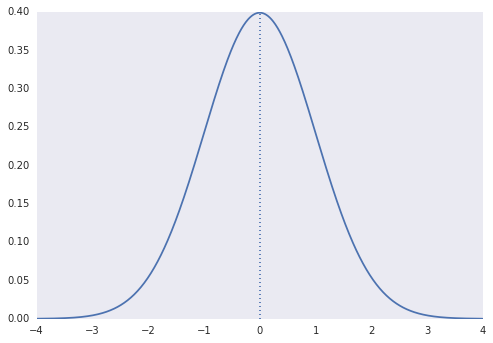

In [8]:
plt.plot(x, y)
plt.axvline(x=0, linestyle='dotted')

Nice!  Now for adding lines for the standard deviations.  Let's make them for deivations betwen $-3$ and $3$

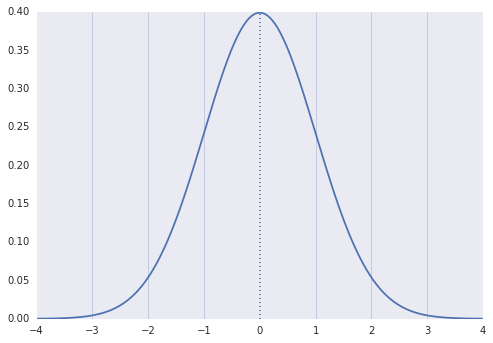

In [9]:
plt.plot(x, y)
plt.axvline(x=0, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=i, lw=.5, alpha=.5)

Wow!  This is looking really good.  It's prefectly plotting out a standard normal curve!  Now we need to make it a little more flexible so we can plot a curve for any mu or sigma.

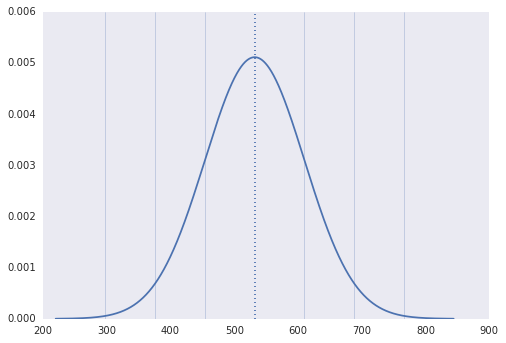

In [10]:
mu, sigma = 532, 78

# x range mu plus/minus 4 standard deviations
x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=mu, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

Now we can generate the normal curve for any mu and sigma.  Let's add a title with those details.

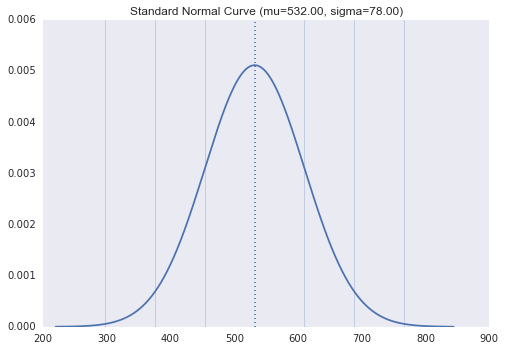

In [11]:
mu, sigma = 532, 78

x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=mu, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

plt.title('Standard Normal Curve (mu=%.2f, sigma=%.2f)' % (mu, sigma))

## Adding tails

Now that we have a good start with the normal curve, let's add a tail to the left side that represents the area under the curve, and a [text](http://matplotlib.org/users/text_intro.html) label showing the tail value and area under the curve (AUC).

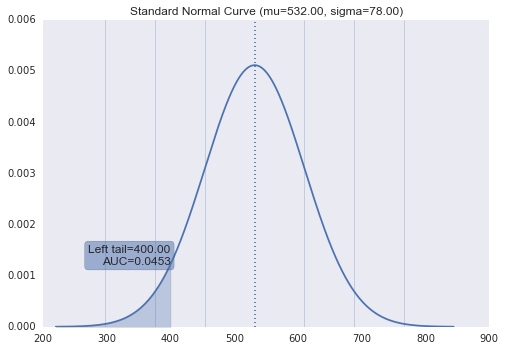

In [12]:
mu, sigma = 532, 78
left_tail = 400

x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=mu, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

plt.title('Standard Normal Curve (mu=%.2f, sigma=%.2f)' % (mu, sigma))


if left_tail:
    x_0 = np.arange(mu - 4 * sigma, left_tail, .01)
    y_0 = norm.pdf(x_0, mu, sigma)
    plt.fill_between(x_0, y_0, alpha=.3)
    
    left_auc = norm.cdf(left_tail, mu, sigma)
    
    plt.text(left_tail, y_0[-1], 
             'Left tail=%.2f\nAUC=%.4f' % (left_tail, left_auc), 
             ha='right', 
             bbox=dict(boxstyle='round', alpha=0.5))

This let's us define the respective x value for our tail.  Let's add the inverse and pass in a AUC value.

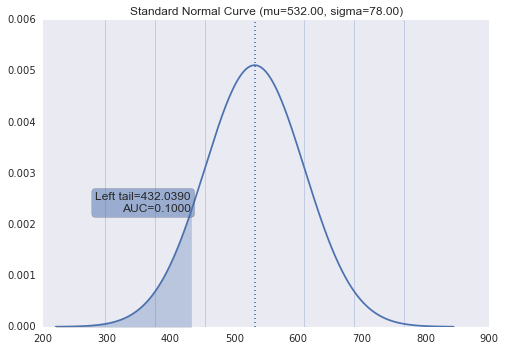

In [13]:
mu, sigma = 532, 78
left_tail, left_auc = None, .1

x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=mu, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

plt.title('Standard Normal Curve (mu=%.2f, sigma=%.2f)' % (mu, sigma))

if 0 < left_auc < 1:
    left_tail = norm.ppf(left_auc, mu, sigma)
else:
    left_acu = 0

if left_tail:
    x_0 = np.arange(mu - 4 * sigma, left_tail, .01)
    y_0 = norm.pdf(x_0, mu, sigma)
    plt.fill_between(x_0, y_0, alpha=.3)
    
    left_auc = norm.cdf(left_tail, mu, sigma)
    
    plt.text(left_tail, y_0[-1], 
             'Left tail=%.4f\nAUC=%.4f' % (left_tail, left_auc), 
             ha='right', 
             bbox=dict(boxstyle='round', alpha=0.5))

Don't forget about the right tail...  And let's show the remaining AUC.

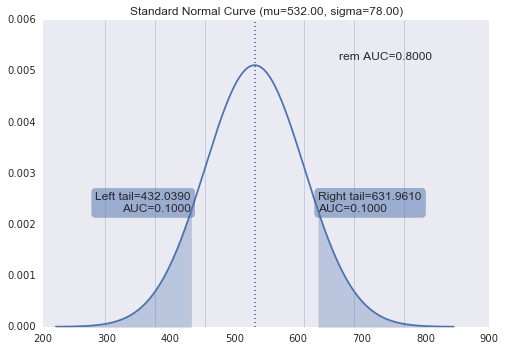

In [14]:
mu, sigma = 532, 78
left_tail, left_auc = None, .1
right_tail, right_auc = None, .1

x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=mu, linestyle='dotted')

for i in range(-3, 4):
    if i != 0:
        plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

plt.title('Standard Normal Curve (mu=%.2f, sigma=%.2f)' % (mu, sigma))

if left_auc:
    left_tail = norm.ppf(left_auc, mu, sigma)
else:
    left_acu = 0

if 0 < left_auc < 1:
    x_0 = np.arange(mu - 4 * sigma, left_tail, .01)
    y_0 = norm.pdf(x_0, mu, sigma)
    plt.fill_between(x_0, y_0, alpha=.3)
    
    left_auc = norm.cdf(left_tail, mu, sigma)
    
    plt.text(left_tail, y_0[-1], 
             'Left tail=%.4f\nAUC=%.4f' % (left_tail, left_auc), 
             ha='right', 
             bbox=dict(boxstyle='round', alpha=0.5))


    
if 0 < right_auc < 1:
    right_tail = norm.ppf(1 - right_auc, mu, sigma)
else:
    right_auc = 0

if right_tail:
    x_0 = np.arange(right_tail, mu + 4 * sigma, .01)
    y_0 = norm.pdf(x_0, mu, sigma)
    plt.fill_between(x_0, y_0, alpha=.3)
    
    right_auc = 1 - norm.cdf(right_tail, mu, sigma)
    
    plt.text(right_tail, y_0[0], 
             'Right tail=%.4f\nAUC=%.4f' % (right_tail, right_auc), 
             ha='left', 
             bbox=dict(boxstyle='round', alpha=0.5))

rem_auc = 1 - left_auc - right_auc
plt.figtext(.8, .8, 'rem AUC=%.4f' % rem_auc, ha='right')

Looks like everything is coming together.  Let's wrap this up in a function and set a few defaults.

In [15]:
def norm_plot(mu=0, sigma=1, left_tail=None, left_auc=None, right_tail=None, right_auc=None):

    x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
    y = norm.pdf(x, mu, sigma)

    plt.plot(x, y)
    plt.axvline(x=mu, linestyle='dotted')

    for i in range(-3, 4):
        if i != 0:
            plt.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

    plt.title('Standard Normal Curve (mu=%.2f, sigma=%.2f)' % (mu, sigma))

    if 0 < left_auc < 1:
        left_tail = norm.ppf(left_auc, mu, sigma)
    else:
        left_auc = 0

    if left_tail:
        x_0 = np.arange(mu - 4 * sigma, left_tail, .01)
        y_0 = norm.pdf(x_0, mu, sigma)
        plt.fill_between(x_0, y_0, alpha=.3)

        left_auc = norm.cdf(left_tail, mu, sigma)

        plt.text(left_tail, y_0[-1], 
                 'Left tail=%.4f\nAUC=%.4f' % (left_tail, left_auc), 
                 ha='right', 
                 bbox=dict(boxstyle='round', alpha=0.5))



    if 0 < right_auc < 1:
        right_tail = norm.ppf(1 - right_auc, mu, sigma)
    else:
        right_auc = 0

    if right_tail:
        x_0 = np.arange(right_tail, mu + 4 * sigma, .01)
        y_0 = norm.pdf(x_0, mu, sigma)
        plt.fill_between(x_0, y_0, alpha=.3)

        right_auc = 1 - norm.cdf(right_tail, mu, sigma)

        plt.text(right_tail, y_0[0], 
                 'Right tail=%.4f\nAUC=%.4f' % (right_tail, right_auc), 
                 ha='left', 
                 bbox=dict(boxstyle='round', alpha=0.5))

    rem_auc = 1 - left_auc - right_auc
    if left_tail or right_tail:
        plt.figtext(.8, .8, 'rem AUC=%.4f' % rem_auc, ha='right')

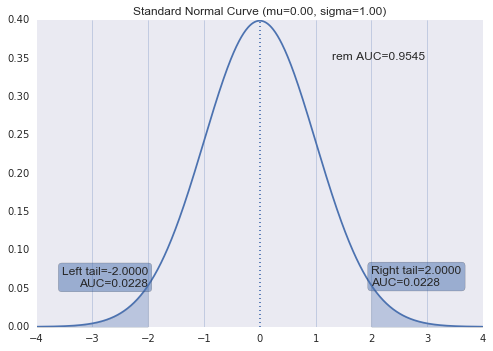

In [16]:
norm_plot(left_tail=-2, right_tail=2)

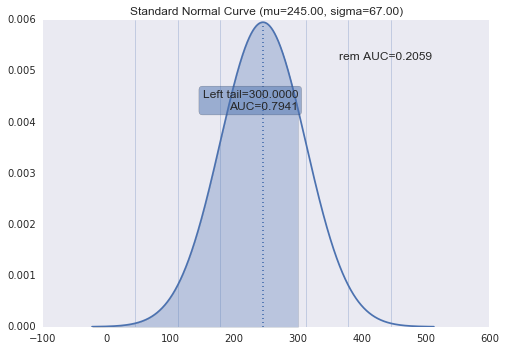

In [17]:
norm_plot(245, 67, left_tail=300)

Nice and easy.  Let's expand this and add an option to pass in an axis so the function can be used in subplots.

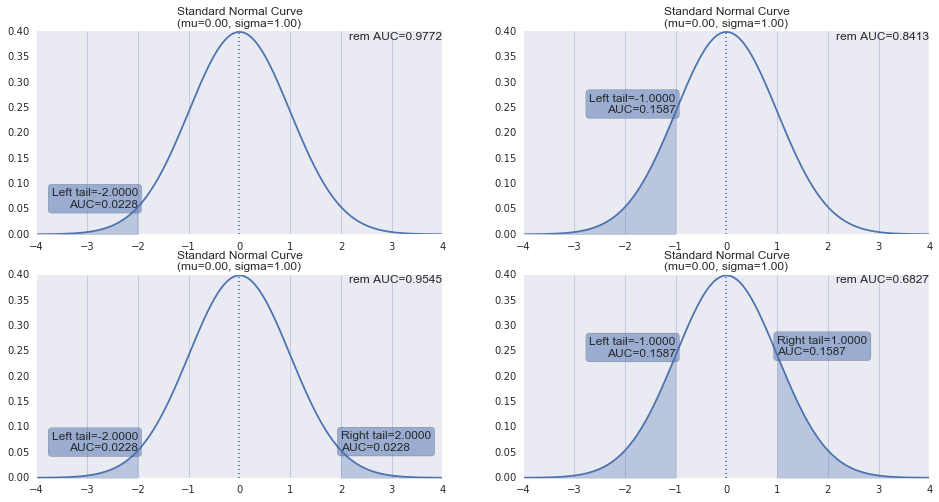

In [18]:
def norm_plot(mu=0, sigma=1, left_tail=None, left_auc=None, right_tail=None, right_auc=None, ax=None):

    if ax == None:
        f, ax = plt.subplots(1,1)
    
    x = np.arange(mu - 4 * sigma, mu + 4 * sigma, .01)
    y = norm.pdf(x, mu, sigma)

    ax.plot(x, y)
    ax.axvline(x=mu, linestyle='dotted')

    for i in range(-3, 4):
        if i != 0:
            ax.axvline(x=mu + i * sigma, lw=.5, alpha=.5)

    ax.set_title('Standard Normal Curve\n(mu=%.2f, sigma=%.2f)' % (mu, sigma))

    if 0 < left_auc < 1:
        left_tail = norm.ppf(left_auc, mu, sigma)
    else:
        left_auc = 0

    if left_tail:
        x_0 = np.arange(mu - 4 * sigma, left_tail, .01)
        y_0 = norm.pdf(x_0, mu, sigma)
        ax.fill_between(x_0, y_0, alpha=.3)

        left_auc = norm.cdf(left_tail, mu, sigma)

        ax.text(left_tail, y_0[-1], 
                 'Left tail=%.4f\nAUC=%.4f' % (left_tail, left_auc), 
                 ha='right', 
                 bbox=dict(boxstyle='round', alpha=0.5))



    if 0 < right_auc < 1:
        right_tail = norm.ppf(1 - right_auc, mu, sigma)
    else:
        right_auc = 0

    if right_tail:
        x_0 = np.arange(right_tail, mu + 4 * sigma, .01)
        y_0 = norm.pdf(x_0, mu, sigma)
        ax.fill_between(x_0, y_0, alpha=.3)

        right_auc = 1 - norm.cdf(right_tail, mu, sigma)

        ax.text(right_tail, y_0[0], 
                 'Right tail=%.4f\nAUC=%.4f' % (right_tail, right_auc), 
                 ha='left', 
                 bbox=dict(boxstyle='round', alpha=0.5))

    rem_auc = 1 - left_auc - right_auc
    if left_tail or right_tail:
        ax.text(1, 1, 'rem AUC=%.4f' % rem_auc, ha='right', va='top',
              transform = ax.transAxes)


f, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(16,8))
norm_plot(left_tail=-2, ax=ax11)
norm_plot(left_tail=-1, ax=ax12)
norm_plot(left_tail=-2, right_tail=2, ax=ax21)
norm_plot(left_tail=-1, right_tail=1, ax=ax22)